In [1]:
"""
Name: example.ipynb
Authors: Stephan Meighen-Berger
Example for the package
"""

'\nName: example.ipynb\nAuthors: Stephan Meighen-Berger\nExample for the package\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from fourth_day import Fourth_Day, config

In [6]:
# Some example settings
# Scenario
config['scenario']['population size'] = 100
config['scenario']['duration'] = 720
config['scenario']['organism movement'] = False
config['scenario']['exclusion'] = True
config['scenario']['injection']['rate'] = 30
config['scenario']['injection']['y range'] = [0., 20.]
# Organisms
config['organisms']['emission fraction'] = 0.1
config['organisms']['alpha'] = 1.
# Geometry
config['geometry']['volume'] = {
    'function': 'rectangle',
    'x_length': 40.,
    'y_length': 20.
}
# Water
config['water']['model']['name'] = 'custom'
config['water']['model']['time step'] = 60

In [7]:
# Creating a fourth_day object
fd = Fourth_Day()

In [8]:
# Launching solver
fd.sim()

In [9]:
fd.statistics[-1]

,species,pos_x,pos_y,velocity,angle,radius,energy,observed,max_emission,emission fraction,regeneration,is_emitting,emission_duration,encounter photons,shear photons,photons
0,Paraphyllina ransoni Russell,40.026023,8.055016,0.0,0.0,0.001357,1.000,False,10.877831,0.1,0.001,False,-588.0,0.0,0.0,0.0
1,Aeginura grimaldii Maas,40.042993,17.992831,0.0,0.0,0.001191,1.000,False,1.135903,0.1,0.001,False,-97.0,0.0,0.0,0.0
2,Praya dubia (Quoy and Gaimard),40.003867,13.442605,0.0,0.0,0.001422,1.000,False,7.875777,0.1,0.001,False,-580.0,0.0,0.0,0.0
3,Nectopyramis natans (Bigelow),40.044938,14.696807,0.0,0.0,0.001231,1.000,False,4.946962,0.1,0.001,False,-403.0,0.0,0.0,0.0
4,Periphyllopsis braueri Vanhoeffen,39.249403,0.647081,0.0,0.0,0.001364,0.916,True,7.745598,0.1,0.001,False,-13.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10895,Euphysora valdiviae Vanhoeffen,0.000000,17.821596,0.0,0.0,0.001319,1.000,True,7.087969,0.1,0.001,False,0.0,0.0,0.0,0.0
10896,Halicreidae unidentified speciese,0.000000,7.611788,0.0,0.0,0.001267,1.000,True,14.512736,0.1,0.001,False,0.0,0.0,0.0,0.0
10897,Aulacoctena acuminata Mortensen,0.000000,16.857577,0.0,0.0,0.000947,1.000,True,11.867128,0.1,0.001,False,0.0,0.0,0.0,0.0
10898,Halitrephes valdiviae H.B. Bigelow,0.000000,18.344640,0.0,0.0,0.000794,1.000,True,8.713759,0.1,0.001,False,0.0,0.0,0.0,0.0


In [10]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.5

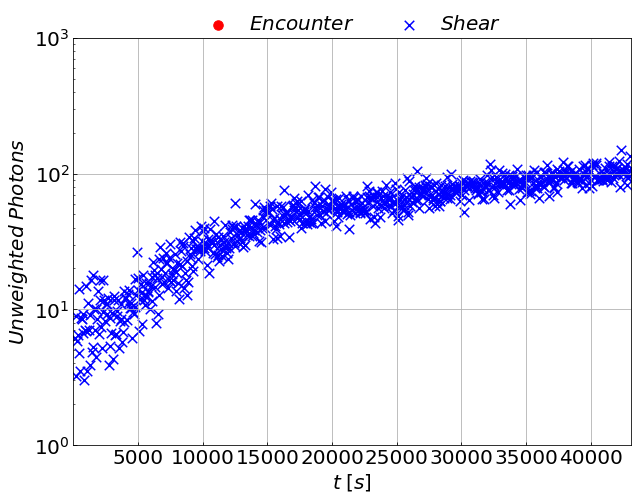

In [26]:
# Energy distributions
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
data_enc = np.array([np.sum(fd.statistics[i].loc[:, 'encounter photons'].values)
                     for i in range(len(fd.t))])
data_shear = np.array([np.sum(fd.statistics[i].loc[:, 'shear photons'].values)
                       for i in range(len(fd.t))])
data = np.array([np.sum(fd.statistics[i].loc[:, 'photons'].values)
                     for i in range(len(fd.t))])
ax1.scatter(fd.t,
            data_enc,
            s=lw*30, color='r', label=r'$Encounter$', marker="o")
ax1.scatter(fd.t,
            data_shear,
            s=lw*30, color='b', label=r'$Shear$', marker="x")
# ax1.scatter(fd.t,
#             data,
#             s=lw*30, color='k', label=r'$Total$', marker="+")
ax1.set_xlim(1e0, max(fd.t))
ax1.set_ylim(1e0, 1e3)
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax1.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h[:2],l[:2], loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
lgd2 = ax1.legend(h[2:],l[2:], loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
plt.show()

In [14]:
figure.savefig(PICS + "MC_Example.png",
               bbox_inches='tight')